# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# here now i am building Linear Regression from Scratch

class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            dw = (-2/n) * np.dot(X.T, (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b



# Now we do testing
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10])

model = LinearRegressionScratch(lr=0.01, epochs=2000)
model.fit(X, y)

predictions = model.predict(X)
print(predictions)



[2.00042549 4.00026249 6.00009948 7.99993648 9.99977348]


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

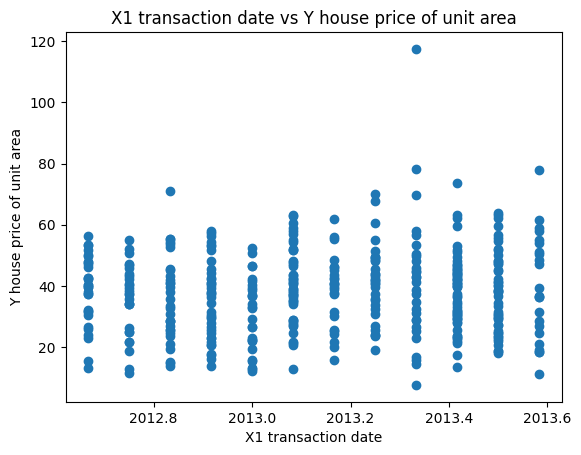

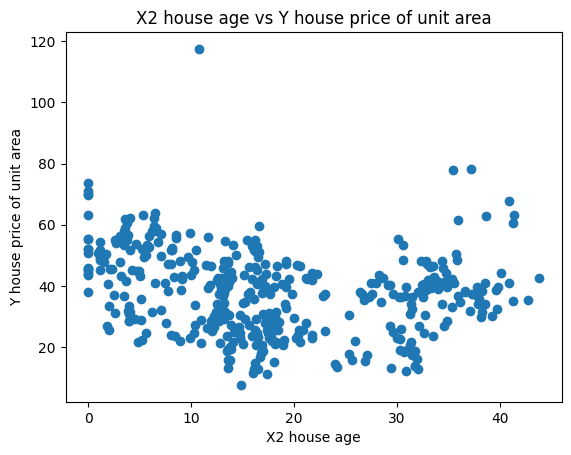

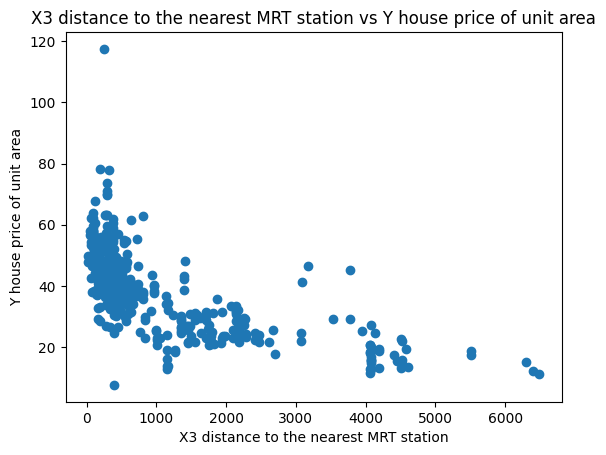

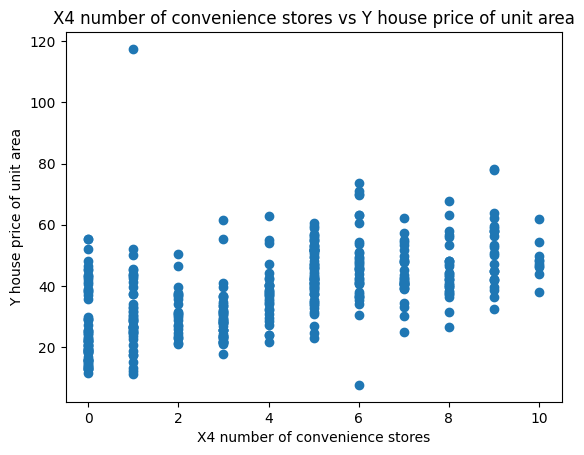

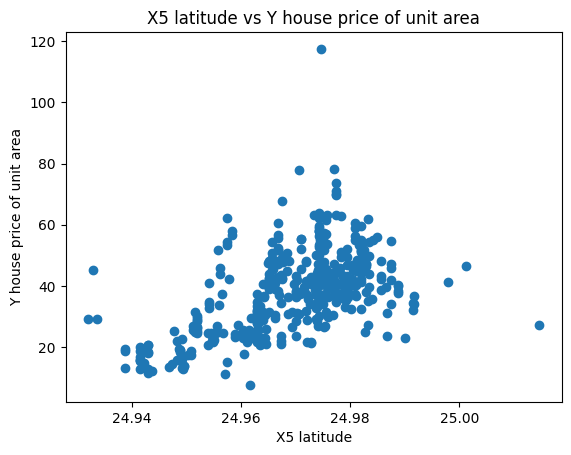

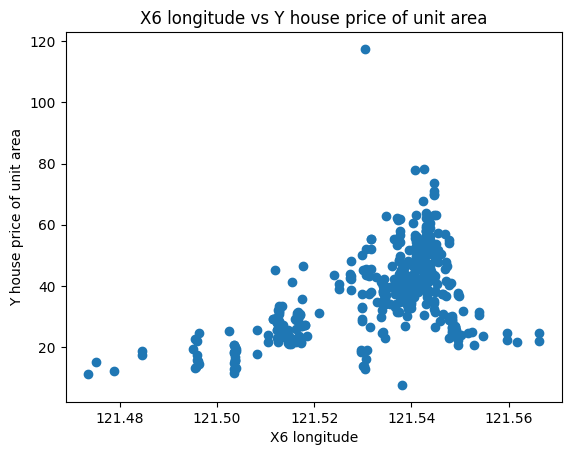

Scratch Model MSE: 65.51308766823854
Scratch Model R2: 0.5869772917049805
Sklearn Model MSE: 66.67336271835958
Sklearn Model R2: 0.5796624182861772
Tuned MSE: 65.16433334006555
Tuned R2: 0.5891759891298531


In [62]:
#first of all i am importing all the libraries which are used for this question

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Now, i am Reading  the dataset using pandas
df = pd.read_csv("Real estate.csv")
df.head()


#Now we will Check for null values
df.isnull().sum()


#If any null value exist the removeing it
df = df.dropna()


#Now , i will Plot each column (except first & last) vs price
price_col = df.columns[-1]

for col in df.columns[1:-1]:
    plt.figure()
    plt.scatter(df[col], df[price_col])
    plt.xlabel(col)
    plt.ylabel(price_col)
    plt.title(f"{col} vs {price_col}")
    plt.show()


#Now , i am Removeing unwanted columns
df = df.iloc[:, 1:]


#Now Spliting dataset into train & test (25% test)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


#Now , Normalizeing X_train and X_test using MinMaxScaler function 
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Now , i am Training  our Linear Regression model from Question 1 
# i simpaly copy past that here

class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            dw = (-2/n) * np.dot(X.T, (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


#Now, i will Train & Predict


scratch_model = LinearRegressionScratch(lr=0.01, epochs=3000)
scratch_model.fit(X_train_scaled, y_train)

y_pred_scratch = scratch_model.predict(X_test_scaled)



# Now, Evaluateing  using MSE and R²

mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print("Scratch Model MSE:", mse_scratch)
print("Scratch Model R2:", r2_scratch)


# Now, Train sklearn Linear Regression model

sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)

y_pred_sk = sk_model.predict(X_test_scaled)

mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print("Sklearn Model MSE:", mse_sk)
print("Sklearn Model R2:", r2_sk)


#now we do Hyperparameter tuning (Scratch model)


tuned_model = LinearRegressionScratch(lr=0.02, epochs=5000)
tuned_model.fit(X_train_scaled, y_train)

y_pred_tuned = tuned_model.predict(X_test_scaled)

print("Tuned MSE:", mean_squared_error(y_test, y_pred_tuned))
print("Tuned R2:", r2_score(y_test, y_pred_tuned))



# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [63]:
#here i am importing all important library which we use for this question 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression as SkLogisticRegression


# Loading  dataset

data = load_breast_cancer()


X = data.data        
y = data.target      


# Normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# now here we do Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)



5. Write code for the sigmoid function and Logistic regression.


In [64]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
     s = sigmoid(z)
     return s * (1 - s)

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs =  epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
      #Write the predict function
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred >= 0.5).astype(int).ravel()  # here i change somting in that you write

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [65]:

# Train & evaluate scratch model
scratch_model = LogisticRegression(learning_rate=0.01, epochs=5000)
scratch_model.fit(X_train, y_train)

y_pred_scratch = scratch_model.predict(X_test)
print("Scratch Accuracy:", accuracy_score(y_test, y_pred_scratch))


Scratch Accuracy: 0.993006993006993


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [66]:
#  Sklearn Logistic Regression (L2) 
sk_l2 = SkLogisticRegression(penalty='l2', max_iter=5000)
sk_l2.fit(X_train, y_train)

y_pred_l2 = sk_l2.predict(X_test)
print("Sklearn L2 Accuracy:", accuracy_score(y_test, y_pred_l2))


# Sklearn Logistic Regression (L1)
sk_l1 = SkLogisticRegression(penalty='l1', solver='liblinear', max_iter=5000)
sk_l1.fit(X_train, y_train)

y_pred_l1 = sk_l1.predict(X_test)
print("Sklearn L1 Accuracy:", accuracy_score(y_test, y_pred_l1))


#Sklearn Logistic Regression (ElasticNet)
sk_elastic = SkLogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    max_iter=5000
)
sk_elastic.fit(X_train, y_train)

y_pred_elastic = sk_elastic.predict(X_test)
print("Sklearn ElasticNet Accuracy:", accuracy_score(y_test, y_pred_elastic))



print("\nClassification Report (Scratch Model):")
print(classification_report(y_test, y_pred_scratch))

print("Classification Report (Sklearn L2 Model):")
print(classification_report(y_test, y_pred_l2))


# Confusion Matrices

print("Confusion Matrix (Scratch Model):")
print(confusion_matrix(y_test, y_pred_scratch))

print("Confusion Matrix (Sklearn L2 Model):")
print(confusion_matrix(y_test, y_pred_l2))


Sklearn L2 Accuracy: 0.9790209790209791
Sklearn L1 Accuracy: 0.9790209790209791
Sklearn ElasticNet Accuracy: 0.9790209790209791

Classification Report (Scratch Model):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Classification Report (Sklearn L2 Model):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix (Scratch Model):
[[53  1]
 [ 0 89]]
Confusion Matrix (Sklearn L2 Model):
[[53  1]
 [ 2 87]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [67]:
#importing all importat library

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier



#Load the data 
df = pd.read_csv("glass.csv")
df.head()


#Extract the X and Y columns.
X = df.iloc[:, 1:-1] 
y = df.iloc[:, -1]    

#Split it into training and testing datasets.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
#here wo do feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [68]:

# Define Euclidean distance

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))




#Build the KNN model
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _predict_single(self, x):
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        return max(set(k_nearest_labels), key=k_nearest_labels.count)

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_single(x) for x in X])





7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [69]:
#Fit scratch KNN & evaluate accuracy

knn_scratch = KNN(k=3)
knn_scratch.fit(X_train, y_train)

y_pred_scratch = knn_scratch.predict(X_test)

scratch_accuracy = accuracy_score(y_test, y_pred_scratch)
print("Scratch KNN Accuracy (k=3):", scratch_accuracy)

#Compare with sklearn model

knn_sk = KNeighborsClassifier(n_neighbors=3)
knn_sk.fit(X_train, y_train)

y_pred_sk = knn_sk.predict(X_test)

sk_accuracy = accuracy_score(y_test, y_pred_sk)
print("Sklearn KNN Accuracy (k=3):", sk_accuracy)


Scratch KNN Accuracy (k=3): 0.6666666666666666
Sklearn KNN Accuracy (k=3): 0.6666666666666666
